In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
qb_data_path = '/content/drive/My Drive/QB.csv'
wr_data_path = '/content/drive/My Drive/RB.csv'
rb_data_path = '/content/drive/My Drive/WR.csv'
te_data_path ='/content/drive/My Drive/TE.csv'

Mounted at /content/drive


**DATASETS**

In [ ]:
qb_data = pd.read_csv(qb_data_path)
wr_data = pd.read_csv(wr_data_path)
rb_data = pd.read_csv(rb_data_path)
te_data = pd.read_csv(te_data_path)

In [ ]:
def generate_risk_scores(data):
    # For simplicity, use random scores (replace with mack's scores)
    data['Risk_Score'] = np.random.rand(len(data))
    return data

In [ ]:
# Applying risk score generation to each position's dataset
qb_data = generate_risk_scores(qb_data)
wr_data = generate_risk_scores(wr_data)
rb_data = generate_risk_scores(rb_data)
te_data = generate_risk_scores(te_data)

In [ ]:
def calculate_composite_scores(data):
    # Weights for the composite score calculation
    weight_depth_chart = 0.5
    weight_active_status = 0.3
    weight_risk_score = 0.2

    # Calculate composite score
    data['Composite_Score'] = (weight_depth_chart / data['Depth Chart'] +
                               weight_active_status * data['Active 1/Out 0'] -
                               weight_risk_score * data['Risk_Score'])
    return data

In [ ]:
qb_data = calculate_composite_scores(qb_data)
wr_data = calculate_composite_scores(wr_data)
rb_data = calculate_composite_scores(rb_data)
te_data = calculate_composite_scores(te_data)

In [ ]:
def recommend_players(data, position):
    # Sorting the players based on the composite score in descending order
    sorted_data = data.sort_values(by='Composite_Score', ascending=False)
    # Printing top 5 recommendations for simplicity, user can customize
    print(f"Top 5 recommended {position} based on composite score:")
    print(sorted_data[['AAM Model', 'Team', 'Composite_Score']].head(5))

In [ ]:
recommend_players(qb_data, 'Quarterbacks')

Top 5 recommended Quarterbacks based on composite score:
          AAM Model Team  Composite_Score
6    Tua Tagovailoa  MIA         0.799191
7   Trevor Lawrence  JAC         0.778178
10       Geno Smith  SEA         0.772634
1       Jalen Hurts  PHI         0.768863
12     Kirk Cousins  MIN         0.766423


In [ ]:
recommend_players(wr_data, 'Wide Receivers')

Top 5 recommended Wide Receivers based on composite score:
              AAM Model Team  Composite_Score
18        Miles Sanders  CAR         0.797190
8       Jonathan Taylor  IND         0.796411
13          Aaron Jones   GB         0.792896
4        Saquon Barkley  NYG         0.782513
6   Rhamondre Stevenson   NE         0.760832


In [ ]:
recommend_players(rb_data, 'Running Backs')

Top 5 recommended Running Backs based on composite score:
          AAM Model Team  Composite_Score
3       Ceedee Lamb  DAL         0.786707
5     Davante Adams  LVR         0.771711
4          AJ Brown  PHI         0.770366
18  Michael Pittman  IND         0.750872
13     Amari Cooper  CLE         0.737638


In [ ]:
recommend_players(te_data, 'Tight Ends')

Top 5 recommended Tight Ends based on composite score:
        AAM Model Team  Composite_Score
2    Mark Andrews  BAL         0.798658
5     Evan Engram  JAC         0.771366
0    Travis Kelce   KC         0.764417
8       Cole Kmet  CHI         0.756740
3  Dallas Goedert  PHI         0.721260


         AAM Model Team  Composite_Score
0       Josh Allen  BUF         0.729982
1      Jalen Hurts  PHI         0.768863
2  Patrick Mahomes   KC         0.663492
3       Joe Burrow  CIN         0.709273
4    Lamar Jackson  BAL         0.689056
5    Justin Fields  CHI         0.661162
6   Tua Tagovailoa  MIA         0.799191
7  Trevor Lawrence  JAC         0.778178
8     Daniel Jones  NYG         0.635350
9       Jared Goff  DET         0.646483


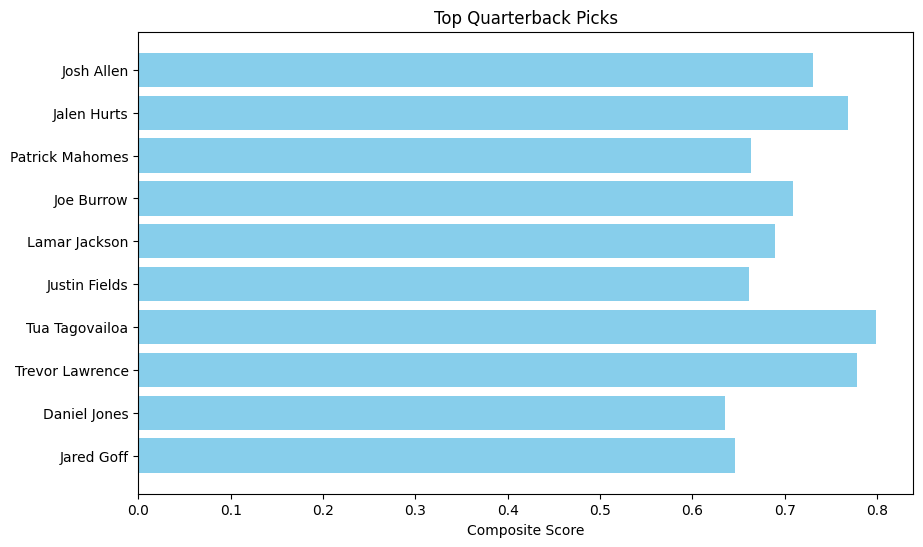

In [ ]:
import matplotlib.pyplot as plt


top_qb_picks = qb_data[['AAM Model', 'Team', 'Composite_Score']].head(10)
print(top_qb_picks)

# Plotting the top QB picks based on composite score
plt.figure(figsize=(10, 6))
plt.barh(top_qb_picks['AAM Model'], top_qb_picks['Composite_Score'], color='skyblue')
plt.xlabel('Composite Score')
plt.title('Top Quarterback Picks')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


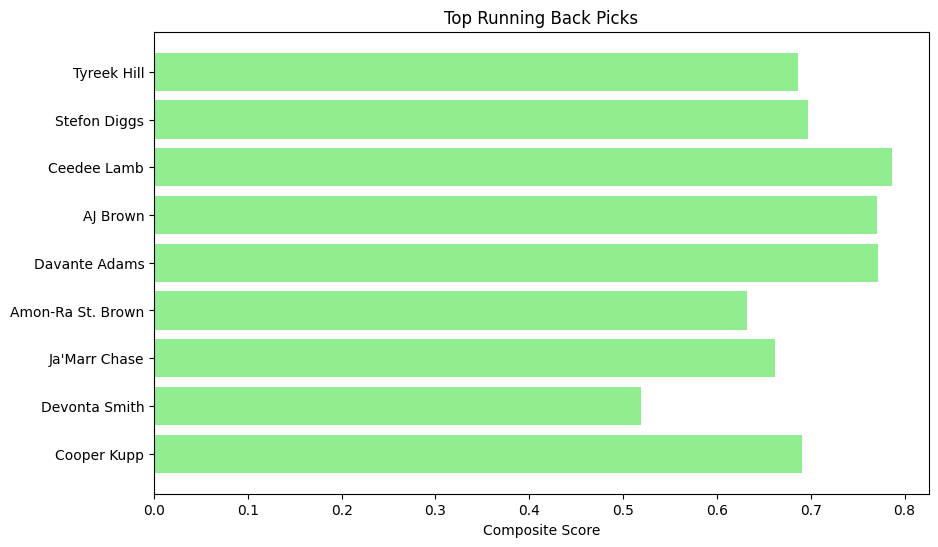

In [ ]:
top_rb_picks = rb_data[['AAM Model', 'Team', 'Composite_Score']].head(10)

# Plotting the top RB picks based on composite score
plt.figure(figsize=(10, 6))
plt.barh(top_rb_picks['AAM Model'], top_rb_picks['Composite_Score'], color='lightgreen')
plt.xlabel('Composite Score')
plt.title('Top Running Back Picks')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()


             AAM Model Team  Composite_Score
0  Christian McCaffrey   SF         0.741208
1        Austin Ekeler  LAC         0.749813
2          Josh Jacobs  LVR         0.709814
3        Derrick Henry  TEN         0.605884
4       Saquon Barkley  NYG         0.782513
5           Nick Chubb  CLE              NaN
6  Rhamondre Stevenson   NE         0.760832
7            Joe Mixon  CIN         0.687241
8      Jonathan Taylor  IND         0.796411
9         Tony Pollard  DAL         0.651147


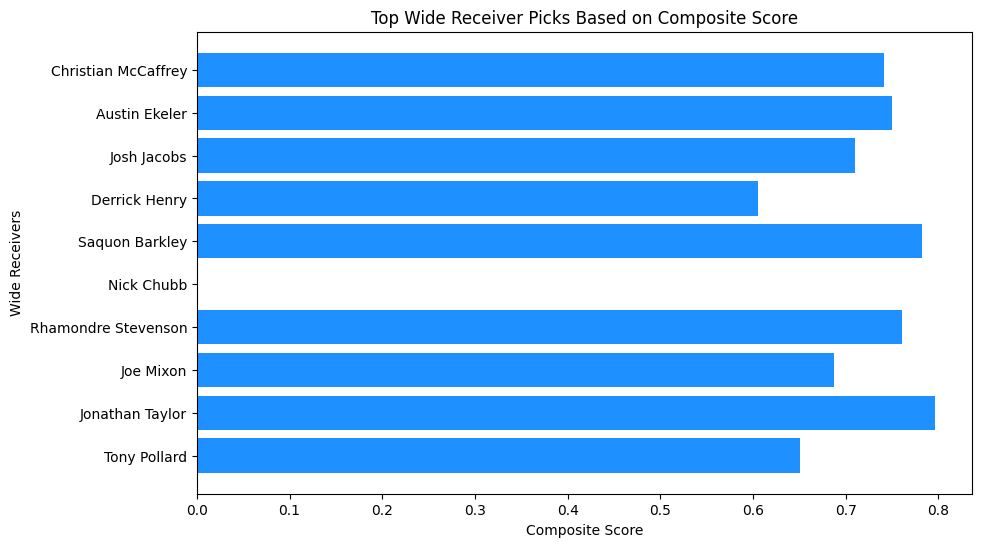

In [ ]:
top_wr_picks = wr_data[['AAM Model', 'Team', 'Composite_Score']].head(10)
print(top_wr_picks)
plt.figure(figsize=(10, 6))
plt.barh(top_wr_picks['AAM Model'], top_wr_picks['Composite_Score'], color='dodgerblue')
plt.xlabel('Composite Score')
plt.ylabel('Wide Receivers')
plt.title('Top Wide Receiver Picks Based on Composite Score')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()

        AAM Model Team  Composite_Score
0    Travis Kelce   KC         0.764417
1   George Kittle   SF         0.602821
2    Mark Andrews  BAL         0.798658
3  Dallas Goedert  PHI         0.721260
4    TJ Hockenson  MIN         0.669378
5     Evan Engram  JAC         0.771366
6  Pat Freiermuth  PIT              NaN
7     David Njoku  CLE         0.652123
8       Cole Kmet  CHI         0.756740
9    Tyler Higbee  LAR         0.661396


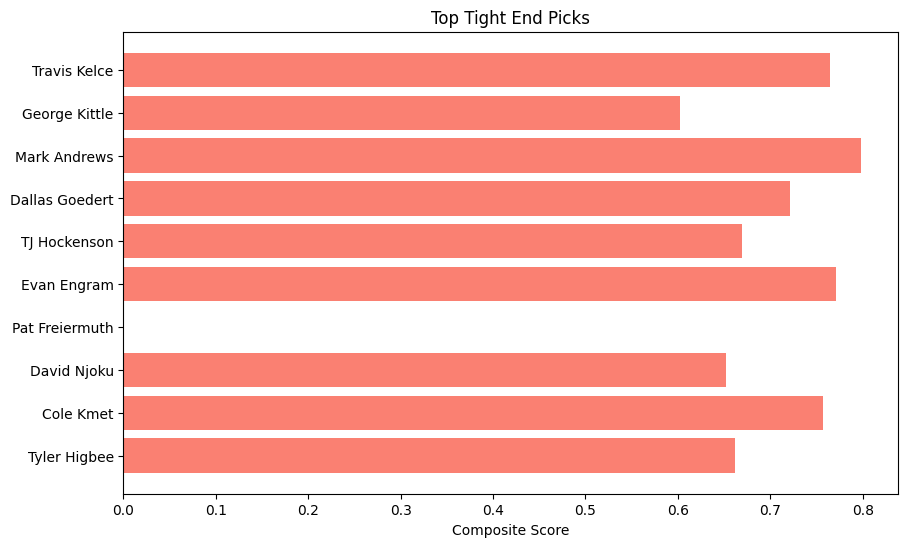

In [ ]:
top_te_picks = te_data[['AAM Model', 'Team', 'Composite_Score']].head(10)
print(top_te_picks)

# Plotting the top TE picks based on composite score
plt.figure(figsize=(10, 6))
plt.barh(top_te_picks['AAM Model'], top_te_picks['Composite_Score'], color='salmon')
plt.xlabel('Composite Score')
plt.title('Top Tight End Picks')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest score on top
plt.show()